In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df = pd.read_csv("/Users/dishahdavey/Desktop/sensor_data.csv")
df

,Timestamp,Machine_ID,Temperature(°C),Vibration(Hz),Pressure(bar),Humidity(%),Failure_Status
0,2025-02-25 10:00:00,M004,80.44,5.03,2.01,42.31,No
1,2025-02-25 10:05:00,M005,70.17,2.51,1.34,36.09,No
2,2025-02-25 10:10:00,M003,75.46,4.27,1.47,23.48,No
3,2025-02-25 10:15:00,M005,67.52,4.89,1.85,37.81,No
4,2025-02-25 10:20:00,M005,72.59,4.08,1.70,42.89,No
...,...,...,...,...,...,...,...
495,2025-02-27 03:15:00,M001,62.84,4.47,2.45,53.88,No
496,2025-02-27 03:20:00,M003,68.51,3.97,1.76,41.79,No
497,2025-02-27 03:25:00,M001,66.48,4.82,2.07,62.95,No
498,2025-02-27 03:30:00,M001,81.58,5.39,2.81,47.30,No


In [7]:
df = pd.read_csv("sensor_data.csv")
df.head()

,Timestamp,Machine_ID,Temperature(°C),Vibration(Hz),Pressure(bar),Humidity(%),Failure_Status
0,2025-02-25 10:00:00,M004,80.44,5.03,2.01,42.31,No
1,2025-02-25 10:05:00,M005,70.17,2.51,1.34,36.09,No
2,2025-02-25 10:10:00,M003,75.46,4.27,1.47,23.48,No
3,2025-02-25 10:15:00,M005,67.52,4.89,1.85,37.81,No
4,2025-02-25 10:20:00,M005,72.59,4.08,1.70,42.89,No


In [9]:
# Check first few rows
df.head()

# Check column names and data types
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        500 non-null    object 
 1   Machine_ID       500 non-null    object 
 2   Temperature(°C)  500 non-null    float64
 3   Vibration(Hz)    500 non-null    float64
 4   Pressure(bar)    500 non-null    float64
 5   Humidity(%)      500 non-null    float64
 6   Failure_Status   500 non-null    object 
dtypes: float64(4), object(3)
memory usage: 27.5+ KB


Timestamp          0
Machine_ID         0
Temperature(°C)    0
Vibration(Hz)      0
Pressure(bar)      0
Humidity(%)        0
Failure_Status     0
dtype: int64

In [14]:
import pandas as pd

# Identify numeric and categorical columns
numeric_cols = ['Temperature(°C)', 'Vibration(Hz)', 'Pressure(bar)', 'Humidity(%)']
categorical_cols = ['Timestamp', 'Machine_ID', 'Failure_Status']

# Convert numeric columns to numeric type (in case they are stored as strings)
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Fill missing values in numeric columns with median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing values in categorical columns with mode
df.fillna({col: df[col].mode()[0] for col in categorical_cols}, inplace=True)

print("✅ Data Cleaning Completed Successfully!")

✅ Data Cleaning Completed Successfully!


In [15]:
# Convert Timestamp column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract useful time-based features
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Weekday'] = df['Timestamp'].dt.weekday  # Monday = 0, Sunday = 6
df['Is_Weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)  # 1 if weekend, else 0

In [16]:
# One-Hot Encoding for 'Machine_ID'
df = pd.get_dummies(df, columns=['Machine_ID'], prefix='Machine')

# Label Encoding for 'Failure_Status' (if it's binary)
df['Failure_Status'] = df['Failure_Status'].map({'No': 0, 'Yes': 1})

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [18]:
# Define feature set (X) and target variable (y)
X = df.drop(columns=['Failure_Status', 'Timestamp'])  # Drop target & timestamp
y = df['Failure_Status']  # Target variable

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [21]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print(classification_report(y_test, y_pred))

Model Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        90
           1       0.82      0.90      0.86        10

    accuracy                           0.97       100
   macro avg       0.90      0.94      0.92       100
weighted avg       0.97      0.97      0.97       100



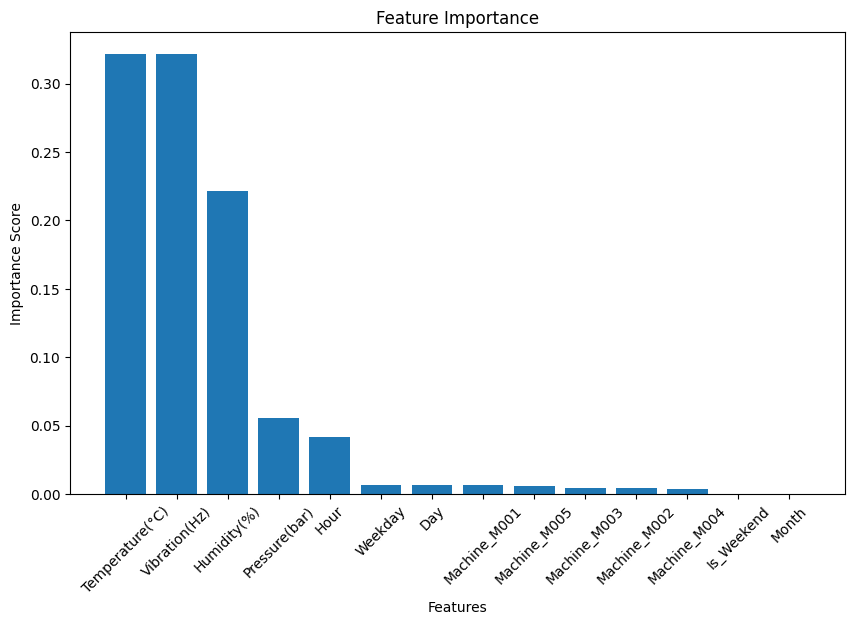

In [22]:
#Step 1: Feature Importance Analysis 
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = model.feature_importances_
feature_names = X_train.columns

# Sort feature importance values
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

In [23]:
# Next Step: Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report
print("Tuned Model Performance:\n", classification_report(y_test, y_pred_best))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Tuned Model Performance:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98        90
           1       0.82      0.90      0.86        10

    accuracy                           0.97       100
   macro avg       0.90      0.94      0.92       100
weighted avg       0.97      0.97      0.97       100



<Figure size 640x480 with 0 Axes>

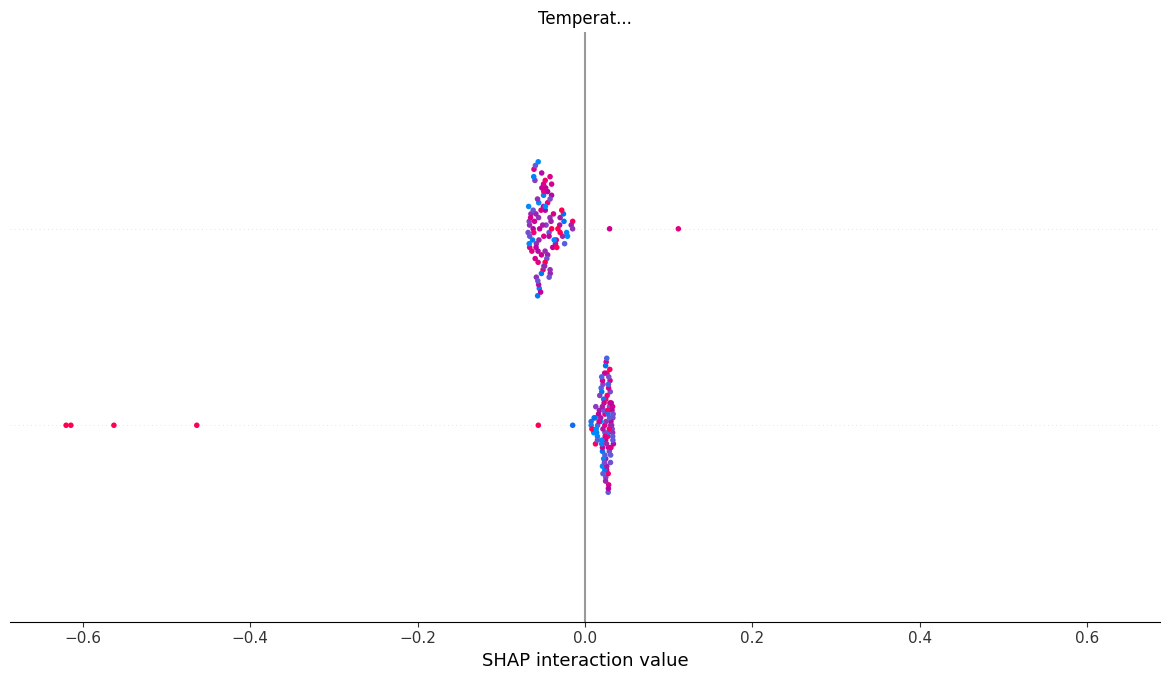

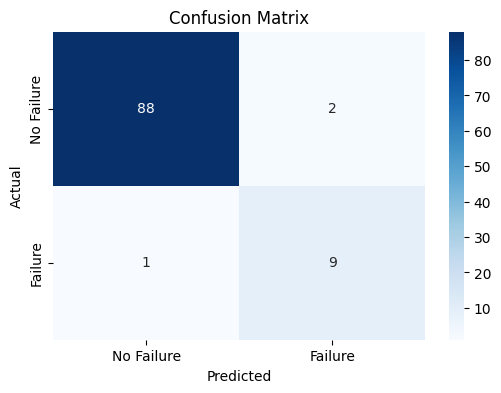

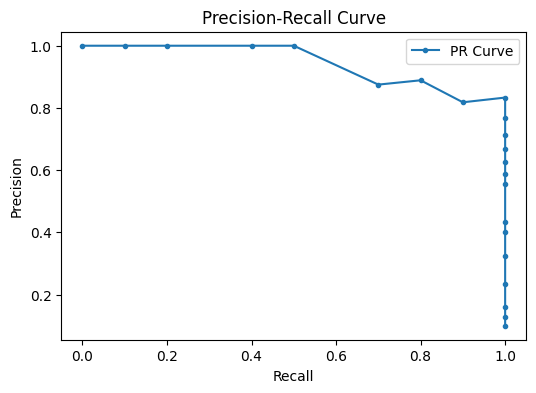

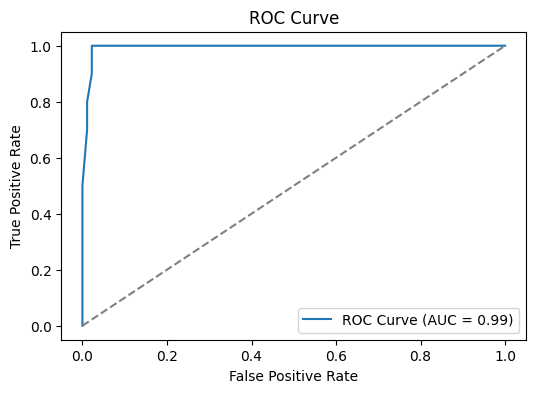

In [31]:
#SHAP, Confusion Matrix & ROC Analysis
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

# Initialize SHAP explainer
explainer = shap.Explainer(model)  # model = your trained model
shap_values = explainer.shap_values(X_test)  # X_test = your test data

# 1️⃣ Summary Plot (Feature Importance)
shap.summary_plot(shap_values, X_test)

# 2️⃣ Confusion Matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 3️⃣ Precision-Recall & ROC Curves
y_probs = model.predict_proba(X_test)[:, 1]  # Get probability estimates

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.', label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()